<a href="https://colab.research.google.com/github/anthonymelson/portfolio/blob/master/Monty_Hall_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Import Packages
import random
import re
import math as math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Set Style
plt.style.use('fivethirtyeight')

# Monty Hall Problem Simulated For Skeptics

This notebook simulates the Monty Hall Problem with the hope that it will weigh on those who have trouble believing its outcome.  Though this problem can be solved with Bayesian statistics, conditional probabilities, informational science, and even set theoretic logic, this step by step simulation tends to perform better at persuasion.

## What is the Monty Hall Problem

![Monty Hall Problem](https://drive.google.com/uc?id=165fyDfFbrHzvfm0uOWecqC2Zo9Gq3ixw)


The Monty Hall Problem results from a simple, but counter-intuitive decison process very similar to one featured on a television game show "Lets Make A Deal" featuring Monty Hall (as the host).  The problem:

* There are three closed doors

* Behind two of those doors there is a goat, and behind the third there is a car

* The contestant starts by selecting any one of the three doors

* After they have made their selection, Monty reveals a goat behind one of the other two doors

* Finally, the contestant is given an opportunity to switch doors

The question is whether it is in their best interest to switch or stay with their original door?  The answer is that they should stay, but many have a hard time believing this.

To settle this for those who deny the statistics and logic of the game (or simply do not understand), they can look at the results of this simulation instead.

## Defining the Monty Hall Game

In [0]:
def MontyHall(num_games):
  #COUNT WINS BY SWITCHING AND NOT SWITCHING, AND NUMBER OF GAMES
  DS_W = 0
  S_W = 0
  i = 0
  switch = [] 
  dont = []
  length = []

  #PLAY 10000 GAMES

  while i < num_games:
      
      #CREATE DOORS
      doors = ['a','a','a']
      
      #SELECT AWARD DOOR
      award = random.choice([0,1,2])
      doors[award] = 'b'
      
      #PLAYER SELECTS DOOR (ASSIGNED C IF DIFFERENT THAN AWARD, AND D IF SAME)
      chosen_door = random.choice([0,1,2])
      if doors[chosen_door] == 'a':
          doors[chosen_door] = 'c'
      else:
          doors[chosen_door] = 'd'
      
      #RANDOMLY ELIMINATE DOOR THAT IS: NOT SELECTED, DOESN'T REVEAL AWARD
      d = doors[0] + doors[1] + doors[2]
      revealed_door = random.choice([a.start() for a in re.finditer('a', d)])
      del doors[revealed_door]

      #SWITCH DOOR FOR THOSE WHO CHOSE AND DIDN'T CHOSE AWARD DOOR FIRST
      d1 = doors[0] + doors[1]
      if d1.find('d') >= 0:
          final = np.fmod(d1.find('d') + 1, 2)
      else:
          final = np.fmod(d1.find('c') + 1, 2)
          
      #SCORE WINS FOR SWITCHING AND NOT
      if d1[final] == 'b':
          S_W = S_W + 1
      else:
          DS_W = DS_W + 1
      
      #ITERATOR
      i = i + 1
      
      #UDPATE WINS OF CHANGING AND NOT, AND GAME LENGTH
      switch.append(S_W)
      dont.append(DS_W)
      length.append(i)
  return  DS_W, S_W, dont, length, switch, i

### Create Plotting Function for Results

In [0]:
#PRINT WINS FOR SWITCHING AND NOT W/PERCENTAGES
def PlotMontyHall(DS_W, S_W, dont, length, switch, i):
  percentDont = DS_W/i
  percentSwitch = S_W/i
  results = {'Won Not Switching': DS_W,
            'Percent Won Not Switching': percentDont,
              'Won Switching': S_W,
              'Percent Won Switching': percentSwitch
            }
  display(pd.DataFrame(data=results, index=[1]).T)

  #PLOT WINS FOR SWITCHING AND NOT AGAINST NUMBER OF GAMES
  dims =(10.7, 7.27)
  fig, ax = plt.subplots(figsize=dims)
  switchPlot = pd.DataFrame(switch, length, ["Switch Wins"])
  dontPlot = pd.DataFrame(dont)
  switchPlot.insert(0, "Dont Switch Wins", dontPlot, True)
  sns.lineplot(ax=ax, data = switchPlot, markers=False)

### Running the Monty Hall Simulation

,1
Won Not Switching,329.000
Percent Won Not Switching,0.329
Won Switching,671.000
Percent Won Switching,0.671


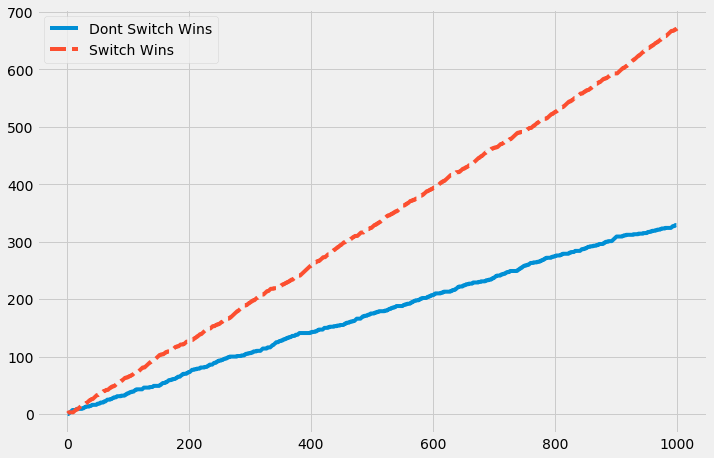

In [60]:
DS_W, S_W, dont, length, switch, i = MontyHall(1000)
PlotMontyHall(DS_W, S_W, dont, length, switch, i)

## Results

These are the expected results.  For those who want more convincing, simply run the simulation more times.  It was left at one thousand so their would be identifiable variability in the plot, but this simulation finishes fast into the hundreds of thousands or millions of iterations.

The only difference however, is how closely it converges on the exact right answer of 1/3 win percentage for not switching, and 2/3 win percentage for switching.